# automaton.ldiv(aut)

Compute the left quotient of two automata, i.e. the automaton recognizing the language of words $v$ such that there exists a word $u$ recognized by lhs with $uv$ recognized by rhs.

In other words, it is the automata equivalent of languages left quotient, denoted by the operator $\backslash$ or by a $-1$ exposant on the left-hand side, and defined by:

$$K \backslash L = K^{-1}L = \bigcup\limits_{u \in K} u^{-1}L$$

where $u^{-1}L$ is the (left) quotient of L by the word u, defined like this:

$$u^{-1}L = \bigcup\limits_{v \in L}u^{-1}v = \{w \mid uw \in L\}$$

For two automata $\mathcal{A}_1, \mathcal{A}_2$ with respective state set $Q_1, Q_2$, the algorithm works as follows:
- Remove all initial transitions of $\mathcal{A}_2$
- For every state pair $(q_1, q_2) \in Q_1 \times Q_2$, set $q_2$ as initial if the following conditions are respected:

  - $(q_1, q_2)$ is accessible in $\mathcal{A}_1 \times \mathcal{A}_2$

  - $q_1$ is final

  Let $i_n$ and $f_n$ denote an initial and a final state of $\mathcal{A}_n$. The first condition ensures that, for any path $i_2 \xrightarrow{u} q2 \xrightarrow{v} f_2$, there is a path $(i_1, i_2) \xrightarrow{u} (q_1, q2)$ in $\mathcal{A}_1 \times \mathcal{A}_2$, and therefore a path $i_1 \xrightarrow{u} q_1$ in $\mathcal{A}_1$. The second condition ensures that $u$ is recognized by $\mathcal{A}_1$.


- Since $q_2$ is set as initial, $\mathcal{A}_2$ now recognizes $v$. So for any path accepting $uv$ in $\mathcal{A}_2$, the constructed automaton recognizes $v$ if and only if $u$ is recognized by $\mathcal{A}_1$.

Preconditions:
- None


# Examples

In [1]:
import vcsn
ctx = vcsn.context('lan_char, b')
aut = lambda e: ctx.expression(e).automaton()

## Quotient of two words

The quotient can be seen as a prefix-remover operator, such that the identity $u\backslash (uv) = v$ is respected for any word $u$ and $v$.

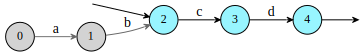

In [2]:
a1 = aut('ab').ldiv(aut('abcd'))
a1

On this example, $u = ab$ and $v = cd$. The suppression of the original initial transitions (on state 0 in this example) will often lead to non-accessible states, which we may want to remove with the [automaton.trim](automaton.trim.ipynb) method:

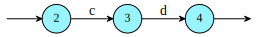

In [3]:
a1.trim()

## Quotient of a language by a word

The quotient of a language by a word is the union of word quotients for all words of the language:

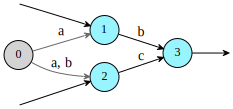

In [4]:
aut('a').ldiv(aut('ab + ac + bc'))

Since "a" is not a prefix of "bc", it is not taken into account in the resulting automaton.

## Quotient of two languages

The quotient of two languages is the union of the quotient of the right-hand side by words of the left-hand side:

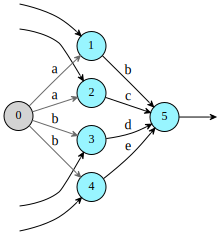

In [5]:
aut('a+b').ldiv(aut('ab + ac + bd + be'))

## Weighted automata

ldiv also works on weighted automata:

In [6]:
wctx = vcsn.context('lan_char, q')
waut = lambda e: wctx.expression(e).automaton()

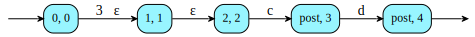

In [7]:
waut('<2>ab').ldiv(waut('<6>abcd'))

## Right quotient

The right quotient of a language by a word is defined similarly as the left quotient:

$L / v = \bigcup\limits_{u \in L}u / v = \{w \mid wv \in L\}$

Which naturaly leads to the right quotient of two languages:

$K / L = \bigcup\limits_{v \in L} K / v$

The right quotient can be expressed using the left quotient and the transpose operator:

$K / L = (L^t \backslash K^t)^t$

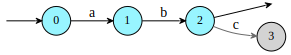

In [8]:
def rdiv(a1, a2):
    return (a2.transpose().ldiv(a1.transpose())).transpose()

rdiv(aut('abc'), aut('c'))